<a href="https://colab.research.google.com/github/annisahmrn/TubesSisCerKel3/blob/main/Pengganti_UAS_SVM_Alcoholic_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import fungsi yang akan dipakai
import pandas as pd # data processing
import numpy as np # working with arrays
import seaborn as sb # visualization
import matplotlib.pyplot as plt # visualization
import seaborn as sns # seaborn visualization
from sklearn.svm import SVC # SVM model algorithm
from sklearn.metrics import accuracy_score # evalution metric
from sklearn.metrics import confusion_matrix # evalution metric
from sklearn.model_selection import train_test_split # splitting the data
from termcolor import colored as cl # text customization

# Baca file excelsheet
# file_fitur = "D:\DataSet\EEGAlcoholDetection\Olah_Fitur_Alkohol.xlsx"

# Load data file excelsheet
print("[INFO] Upload Files...")
from google.colab import files
dataset = files.upload()

# Check list sheet yang ada
df_sheet_all = pd.read_excel('Olah_Fitur_Alkohol.xlsx', sheet_name = None)
print(df_sheet_all.keys())

[INFO] Upload Files...


Saving Olah_Fitur_Alkohol.xlsx to Olah_Fitur_Alkohol.xlsx
dict_keys(['fitur Train', 'fitur Test', 'recap', 'avTrain', 'avTest', 'avChSelectTrain', 'avChSelectTest', 'avChAFTrain', 'avChAFTest', 'avChFTrain', 'avChFTest', 'avChFpTrain', 'avChFpTest', 'avChOTrain', 'avChOTest'])


# Split data fitur dan class dari sheet 'avTrain'

In [ ]:
# Baca data dari 'avTrain'
df_sheet_fitur_train = pd.read_excel('Olah_Fitur_Alkohol.xlsx', sheet_name="avTrain")

print(" ")
print(" ")
print("Data pada avTrain")
print("Jumlah data dan fitur Train = ", df_sheet_fitur_train.shape)
df_sheet_fitur_train.tail(10)

 
 
Data pada avTrain
Jumlah data dan fitur Train =  (468, 5)


,av.act,av.mob,av.comp,av.en,class
458,41.846712,0.269456,2.349719,2587.324947,alcoholic
459,87.006644,0.247766,2.421542,3766.561368,alcoholic
460,97.257534,0.140168,5.896321,4132.611579,alcoholic
461,65.848567,0.230261,2.448162,3200.138737,alcoholic
462,132.456228,0.197028,3.352427,4848.440316,alcoholic
463,72.926815,0.198584,3.253247,3617.542421,alcoholic
464,205.521463,0.118320,7.750032,6358.686947,alcoholic
465,110.185888,0.218684,2.002626,4455.867579,alcoholic
466,42.210014,0.218673,3.372682,2671.744737,alcoholic
467,62.457303,0.250851,2.295430,3221.917789,alcoholic


In [ ]:
# Check apakah ada data yang bernilai null

print("Jumlah data bernilai null pada avTrain")
print(df_sheet_fitur_train.isnull().sum())

Jumlah data bernilai null pada avTrain
av.act     0
av.mob     0
av.comp    0
av.en      0
class      0
dtype: int64


In [ ]:
# split data fitur dan class
df_fitur_train = df_sheet_fitur_train.iloc[:,0:4].values
df_class_train = df_sheet_fitur_train.iloc[:,4].values

print("Fitur list")
print(df_fitur_train)
print(df_fitur_train.shape)

print(' ')

print("Class list")
print(df_class_train)
print(df_class_train.shape)

Fitur list
[[6.36105958e+01 4.51158306e-01 2.00321418e+00 3.11243642e+03]
 [5.11007865e+01 4.21485143e-01 2.13849535e+00 2.81926705e+03]
 [3.19237342e+01 2.57880244e-01 2.65147858e+00 2.26831000e+03]
 ...
 [1.10185888e+02 2.18683635e-01 2.00262561e+00 4.45586758e+03]
 [4.22100139e+01 2.18673013e-01 3.37268178e+00 2.67174474e+03]
 [6.24573034e+01 2.50850761e-01 2.29542975e+00 3.22191779e+03]]
(468, 4)
 
Class list
['alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'

# Split data fitur dan class dari sheet ‘avTest’

In [ ]:
# Baca data dari 'avTest'
df_sheet_fitur_test = pd.read_excel('Olah_Fitur_Alkohol.xlsx', sheet_name="avTest")

print(" ")
print(" ")
print("Data pada avTest")
print("Jumlah data dan fitur Test = ", df_sheet_fitur_test.shape)
df_sheet_fitur_test.tail(10)

 
 
Data pada avTest
Jumlah data dan fitur Test =  (478, 5)


,av.act,av.mob,av.comp,av.en,class
468,117.085490,0.195557,5.994871,4030.316211,alcoholic
469,324.354375,0.196613,4.689946,5568.621474,alcoholic
470,63.606094,0.197361,6.469141,3991.059750,alcoholic
471,83.957812,0.237266,2.160844,3653.152263,alcoholic
472,30.932134,0.274557,2.619435,2262.458211,alcoholic
473,81.793196,0.217228,2.901811,3829.789789,alcoholic
474,39.049327,0.253051,2.577463,2620.759053,alcoholic
475,72.218399,0.213203,3.099613,3474.987158,alcoholic
476,60.845471,0.222453,2.913789,3209.007263,alcoholic
477,55.511677,0.222471,2.720327,3123.868842,alcoholic


In [ ]:
# Check apakah ada data yang bernilai null

print("Jumlah data bernilai null pada fitur Test")
print(df_sheet_fitur_test.isnull().sum())

Jumlah data bernilai null pada fitur Test
av.act     0
av.mob     0
av.comp    0
av.en      0
class      0
dtype: int64


In [ ]:
# split data fitur dan class

df_fitur_test = df_sheet_fitur_test.iloc[:,0:4].values
df_class_test = df_sheet_fitur_test.iloc[:,4].values

print("Fitur list")
print(df_fitur_test)
print(df_fitur_test.shape)

print(' ')

print("Class list")
print(df_class_test)
print(df_class_test.shape)

Fitur list
[[6.06020756e+01 3.28048384e-01 2.81737543e+00 3.19961221e+03]
 [5.38178895e+02 1.73842376e-01 5.13504365e+00 6.78304668e+03]
 [8.05428593e+01 2.30902034e-01 3.26842092e+00 3.71729779e+03]
 ...
 [7.22183987e+01 2.13203334e-01 3.09961266e+00 3.47498716e+03]
 [6.08454706e+01 2.22453165e-01 2.91378905e+00 3.20900726e+03]
 [5.55116768e+01 2.22470848e-01 2.72032688e+00 3.12386884e+03]]
(478, 4)
 
Class list
['alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'

# Algoritma SVM untuk reclassification

In [ ]:
# Resume dari data yang akan dianalisa

print('Data training')
print('Fitur')
print(df_fitur_train.shape)
print(df_fitur_train)

print(' ')
print('Class')
print(df_class_train.shape)
print(df_class_train)

print(' ')
print(' ')
print('Data test')
print('Fitur')
print(df_fitur_test.shape)
print(df_fitur_test)

print(' ')
print('Class')
print(df_class_test.shape)
print(df_class_test)

Data training
Fitur
(468, 4)
[[6.36105958e+01 4.51158306e-01 2.00321418e+00 3.11243642e+03]
 [5.11007865e+01 4.21485143e-01 2.13849535e+00 2.81926705e+03]
 [3.19237342e+01 2.57880244e-01 2.65147858e+00 2.26831000e+03]
 ...
 [1.10185888e+02 2.18683635e-01 2.00262561e+00 4.45586758e+03]
 [4.22100139e+01 2.18673013e-01 3.37268178e+00 2.67174474e+03]
 [6.24573034e+01 2.50850761e-01 2.29542975e+00 3.22191779e+03]]
 
Class
(468,)
['alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 

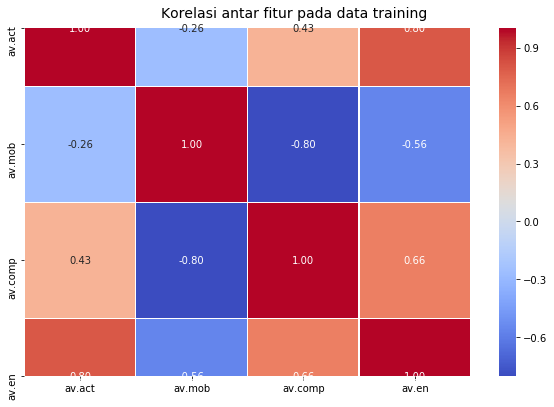

In [ ]:
# Korelasi antar fitur data training

from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Heatmap matriks korelas
f, ax = plt.subplots(figsize=(10, 6))
corr =df_sheet_fitur_train.corr()
corr =df_sheet_fitur_train.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Korelasi antar fitur pada data training', fontsize=14)

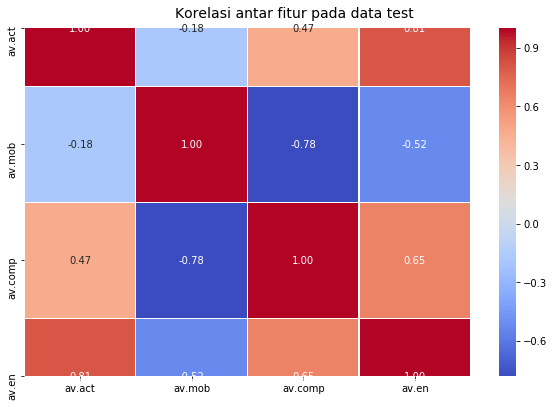

In [ ]:
# Korelasi antar fitur data test

# Heatmap matriks korelas
f, ax = plt.subplots(figsize=(10, 6))
corr =df_sheet_fitur_test.corr()
corr =df_sheet_fitur_test.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Korelasi antar fitur pada data test', fontsize=14)

Pair plot fitur untuk tiap class
Data Training


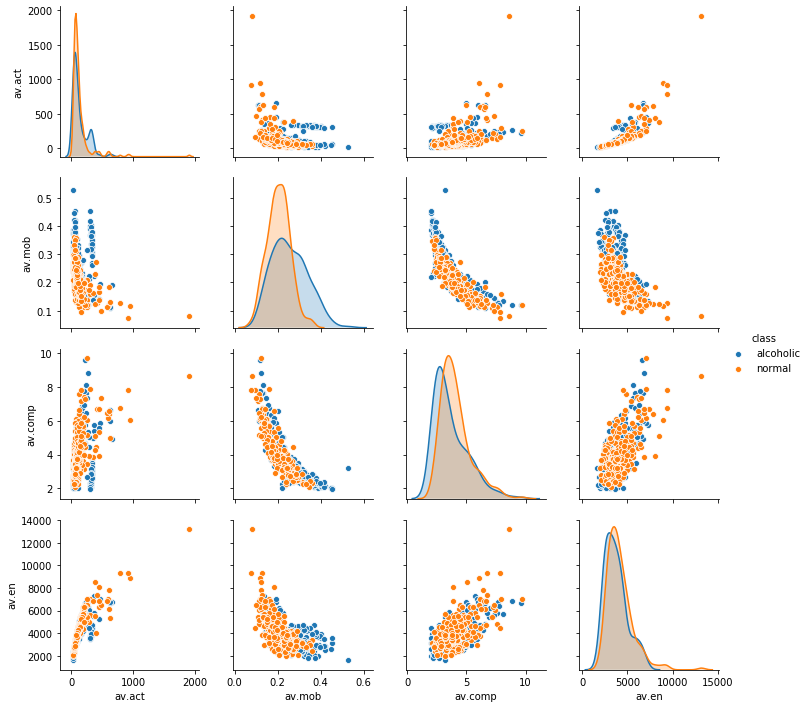

In [ ]:
# Plot Class dalam grafik antar fitur pada data training

print("Pair plot fitur untuk tiap class")
print("Data Training")
sns.pairplot(df_sheet_fitur_train, hue='class')

Pair plot fitur untuk tiap class
Data Test


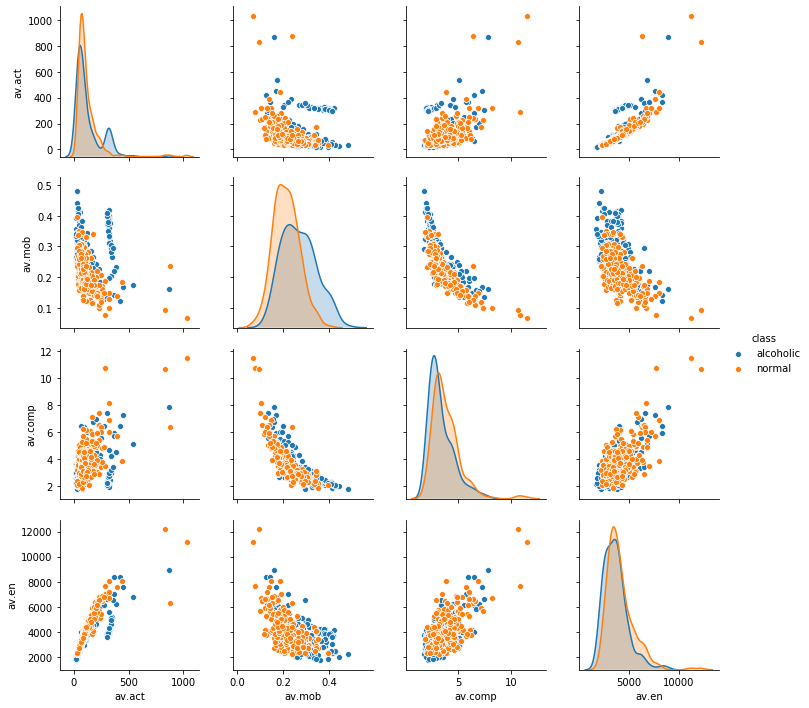

In [ ]:
# Plot class dalam grafik antar fitur pada data test

print("Pair plot fitur untuk tiap class")
print("Data Test")
sns.pairplot(df_sheet_fitur_test, hue='class')

In [ ]:
# Klasifikasi dengan Support Vector Machine

from sklearn.svm import SVC

# Inisialisasi Support Vector Machine dan fitting data training

classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(df_fitur_train,df_class_train)

#Prediksi class pada data test
df_class_train_pred = classifier.predict(df_fitur_test)

print(df_class_train_pred)

# Tambahkan kolom 'Prediction' pada data test untuk perbandingan anta realitas dan hasil prediksi
df_sheet_fitur_test["prediction"] = df_class_train_pred
print(df_sheet_fitur_test)

['normal' 'alcoholic' 'normal' 'normal' 'alcoholic' 'normal' 'alcoholic'
 'alcoholic' 'alcoholic' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'alcoholic' 'alcoholic' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'alcoholic' 'alcoholic'
 'normal' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'normal' 'alcoholic' 'normal' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'normal' 'alcoholic' 'normal'
 'normal' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'normal'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'normal' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alcoholic' 'normal' 'alcoholic' 'alcoholic' 'normal'
 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic' 'alcoholic'
 'alcoholic' 'alc

[[118 120]
 [ 48 192]]

Akurasi SVM dari dataset adalah:  0.6485355648535565


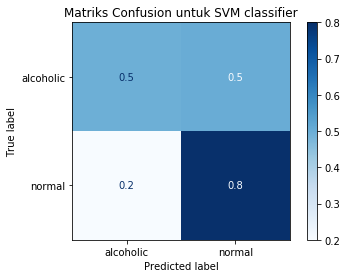

In [ ]:
# Hitung akurasi dari prediksi dengan matriks confusion

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(df_class_test, df_class_train_pred)
accuracy = float(cm.diagonal().sum())/len(df_class_test)

print(cm)
print("\nAkurasi SVM dari dataset adalah: ", accuracy)

# Buat matriks confusion
matrix = plot_confusion_matrix(classifier.fit(df_fitur_train,df_class_train), 
                               df_fitur_test, df_class_test,
                               cmap=plt.cm.Blues, normalize='true')
plt.title('Matriks Confusion untuk SVM classifier')
plt.show(matrix)
plt.show()